In [25]:
library(ggplot2)
library(leaflet)
library(mapproj)
library(proj4)
library(geoR)
library(dplyr)
library(fields)
library(readr)
library(IRdisplay)

theme_set(theme_light())

# Theoretical Semivariograms and Covariance

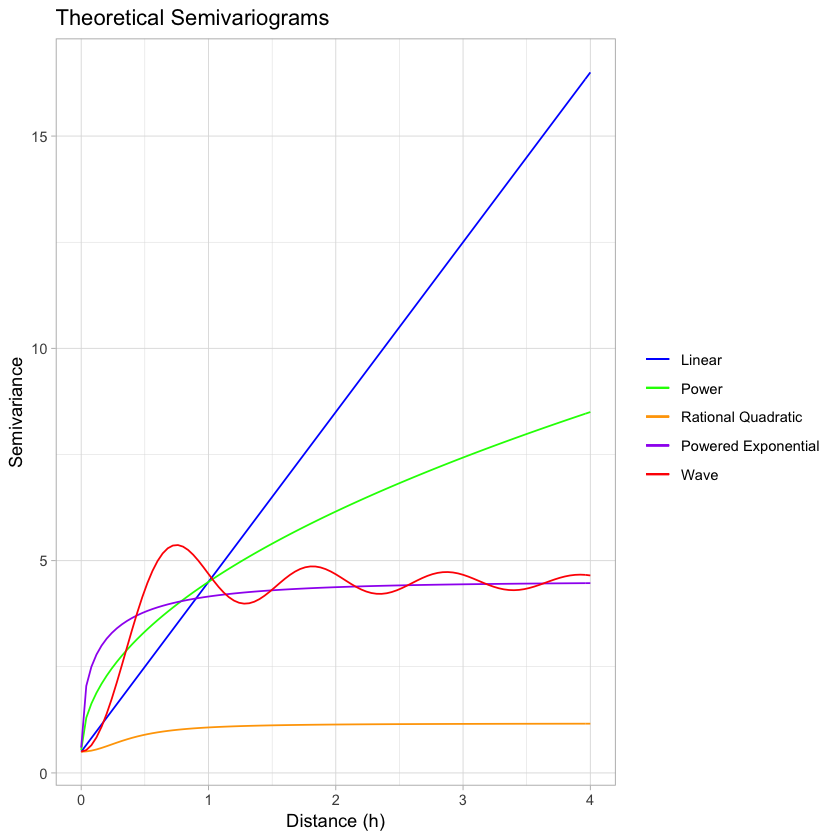

In [2]:
# 1a.
tao_sq = 0.5
sigma_sq = 4
phi = 6
lambda = 0.5

eq_linear = function(h){tao_sq + sigma_sq*h}
eq_power = function(h){tao_sq + sigma_sq*h^lambda}
eq_quadratic = function(h){tao_sq + (sigma_sq*h^2)/(1+phi*h^2)}
eq_expo = function(h){tao_sq + sigma_sq*(1-exp(-(abs(phi*h))^lambda))}
eq_wave = function(h){tao_sq + sigma_sq*(1-sin(phi*h)/(phi*h))}

ggplot(data.frame(x=c(0.0001, 4)), aes(x=x)) +
    stat_function(fun=eq_linear, geom="line", aes(col='blue')) +
    stat_function(fun=eq_power, geom="line", aes(col='green')) +
    stat_function(fun=eq_quadratic, geom="line", aes(col='orange')) +
    stat_function(fun=eq_expo, geom="line", aes(col='purple')) +
    stat_function(fun=eq_wave, geom="line", aes(col='red')) +
    labs(title='Theoretical Semivariograms',
         x='Distance (h)',
         y='Semivariance') +
    scale_color_manual(labels=c('Linear', 'Power', 'Rational Quadratic',
                                'Powered Exponential', 'Wave'), 
                       values=c('blue', 'green', 'orange', 
                                'purple', 'red'),
                       name=NULL)

1b) The four curves are in the following order of increasing variance: \
    **Rational Quadratic < Powered Exponential < Wave < Power.** \
    Note that they are all stationary (except for the linear function), and notice the **Wave** curve oscillates around the asymptote of the **Powered Exponential** curve.

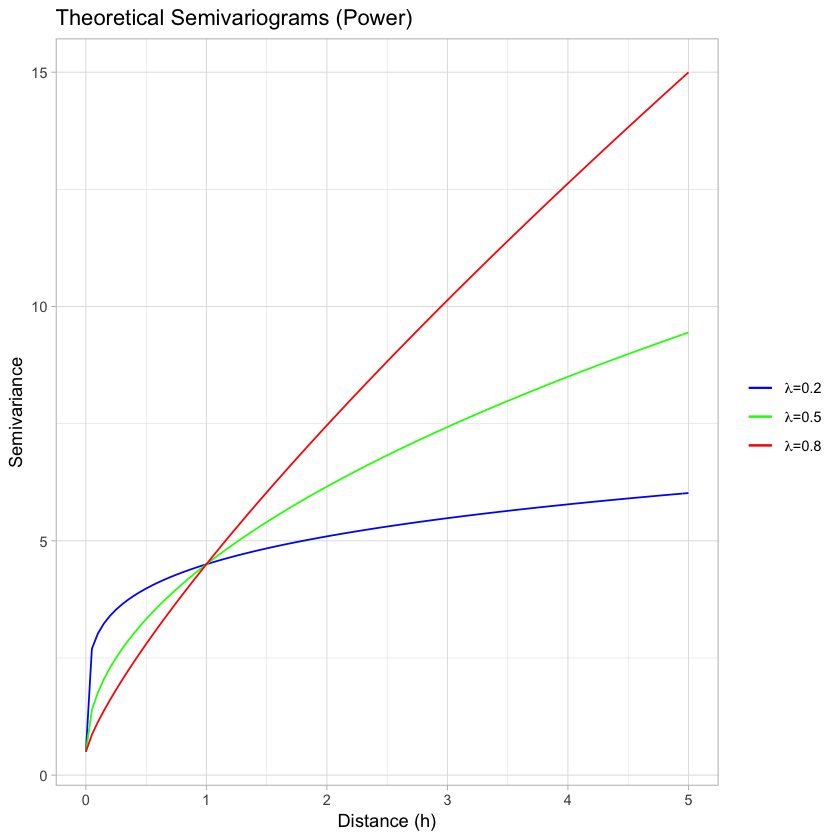

In [3]:
# 1c.
lambda = 0.5
lambda_small = 0.2
lambda_big = 0.8

eq_power = function(h){tao_sq + sigma_sq*h^lambda}
eq_power_s = function(h){tao_sq + sigma_sq*h^lambda_small}
eq_power_b = function(h){tao_sq + sigma_sq*h^lambda_big}

ggplot(data.frame(x=c(0, 5)), aes(x=x)) +
    stat_function(fun=eq_power_s, geom="line", aes(col='blue')) +
    stat_function(fun=eq_power, geom="line", aes(col='green')) +
    stat_function(fun=eq_power_b, geom="line", aes(col='red')) +
    labs(title='Theoretical Semivariograms (Power)',
         x='Distance (h)',
         y='Semivariance') +
    scale_color_manual(labels=c(expression(lambda*'=0.2'),
                                expression(lambda*'=0.5'),
                                expression(lambda*'=0.8')), 
                       values=c('blue','green','red'),
                       name=NULL)

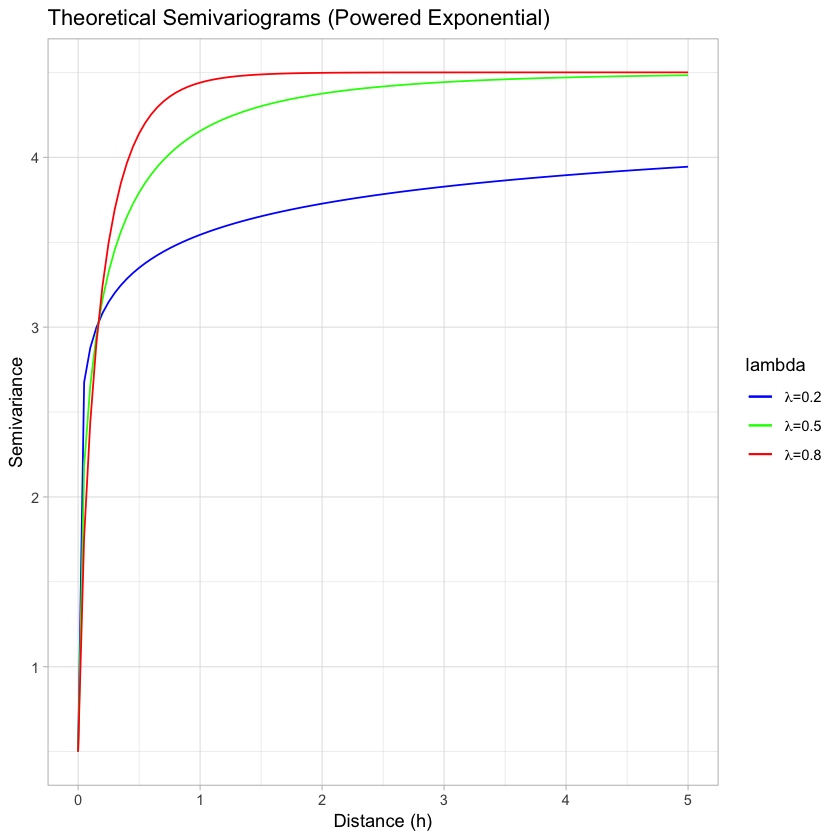

In [4]:
eq_expo = function(h){tao_sq + sigma_sq*(1-exp(-(abs(phi*h))^lambda))}
eq_expo_s = function(h){tao_sq + sigma_sq*(1-exp(-(abs(phi*h))^lambda_small))}
eq_expo_b = function(h){tao_sq + sigma_sq*(1-exp(-(abs(phi*h))^lambda_big))}

ggplot(data.frame(x=c(0, 5)), aes(x=x)) +
    stat_function(fun=eq_expo_s, geom="line", aes(col='blue')) +
    stat_function(fun=eq_expo, geom="line", aes(col='green')) +
    stat_function(fun=eq_expo_b, geom="line", aes(col='red')) +
    labs(title='Theoretical Semivariograms (Powered Exponential)',
         x='Distance (h)',
         y='Semivariance') +
    scale_color_manual(labels=c(expression(lambda*'=0.2'),
                                expression(lambda*'=0.5'),
                                expression(lambda*'=0.8')), 
                       values=c('blue','green','red'),
                       name='lambda')

It is obvious that lambda is directly proportional to data variance.

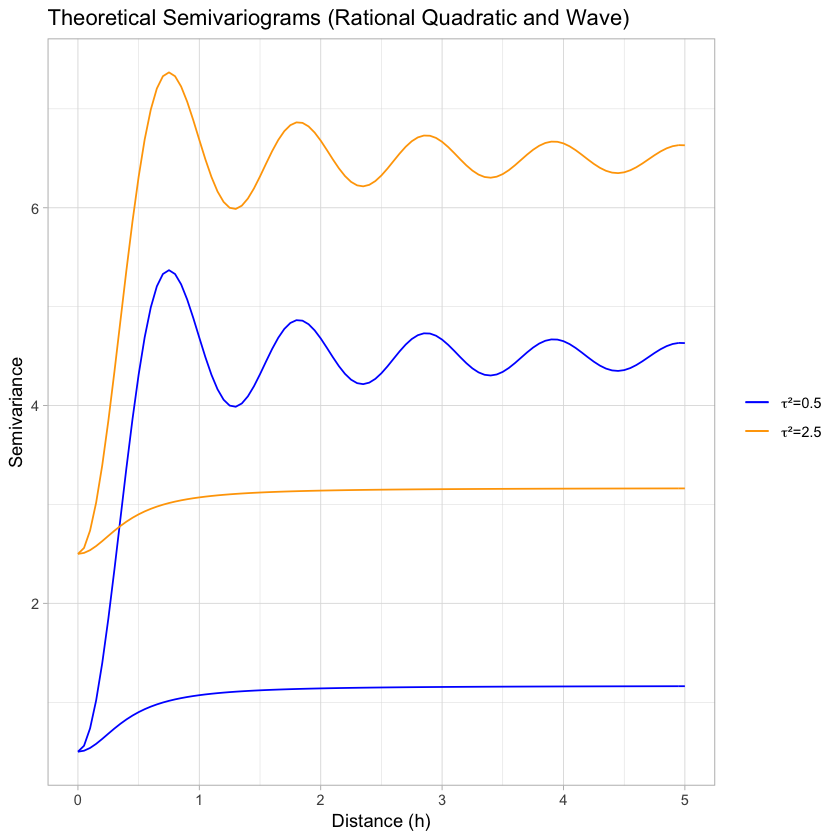

In [5]:
# 1d.
tao_sq = 0.5
tao_sq_big = 2.5

eq_quadratic = function(h){tao_sq + (sigma_sq*h^2)/(1+phi*h^2)}
eq_wave = function(h){tao_sq + sigma_sq*(1-sin(phi*h)/(phi*h))}

eq_quadratic_b = function(h){tao_sq_big + (sigma_sq*h^2)/(1+phi*h^2)}
eq_wave_b = function(h){tao_sq_big + sigma_sq*(1-sin(phi*h)/(phi*h))}

ggplot(data.frame(x=c(0.0001, 5)), aes(x=x)) +
    stat_function(fun=eq_quadratic, geom="line", aes(col='blue')) +
    stat_function(fun=eq_wave, geom="line", col='blue') +
    stat_function(fun=eq_quadratic_b, geom="line", aes(col='orange')) +
    stat_function(fun=eq_wave_b, geom="line", col='orange') +
    labs(title='Theoretical Semivariograms (Rational Quadratic and Wave)',
         x='Distance (h)',
         y='Semivariance') +
    scale_color_manual(labels=c(expression(tau*'\U00B2=0.5'),
                                expression(tau*'\U00B2=2.5')), 
                       values=c('blue','orange'),
                       name=NULL)

Varying tao-square simply shifts the function along the y-axis accordingly.

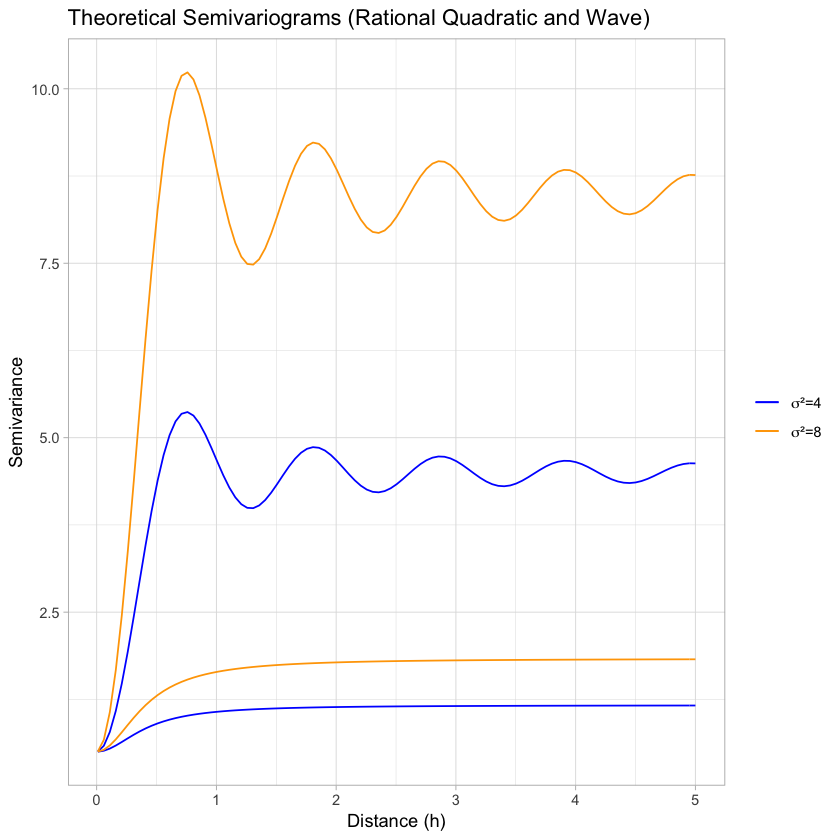

In [6]:
sigma_sq = 4
sigma_sq_big = 8

eq_quadratic = function(h){tao_sq + (sigma_sq*h^2)/(1+phi*h^2)}
eq_wave = function(h){tao_sq + sigma_sq*(1-sin(phi*h)/(phi*h))}

eq_quadratic_b = function(h){tao_sq + (sigma_sq_big*h^2)/(1+phi*h^2)}
eq_wave_b = function(h){tao_sq + sigma_sq_big*(1-sin(phi*h)/(phi*h))}

ggplot(data.frame(x=c(0.01, 5)), aes(x=x)) +
    stat_function(fun=eq_quadratic, geom="line", aes(col='blue')) +
    stat_function(fun=eq_wave, geom="line", col='blue') +
    stat_function(fun=eq_quadratic_b, geom="line", aes(col='orange')) +
    stat_function(fun=eq_wave_b, geom="line", col='orange') +
    labs(title='Theoretical Semivariograms (Rational Quadratic and Wave)',
         x='Distance (h)',
         y='Semivariance') +
    scale_color_manual(labels=c(expression(sigma*'\U00B2=4'),
                                expression(sigma*'\U00B2=8')), 
                       values=c('blue','orange'),
                       name=NULL)

Sigma-square is directly proportional to data variance.

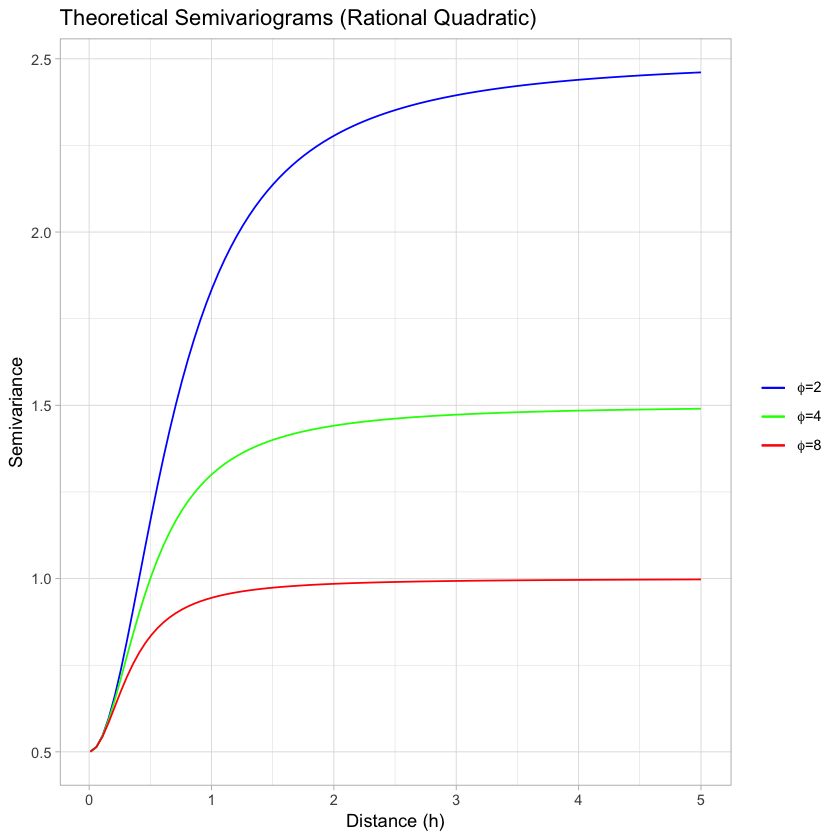

In [7]:
phi = 4
phi_big = 8
phi_small = 2

eq_quadratic = function(h){tao_sq + (sigma_sq*h^2)/(1+phi*h^2)}
eq_quadratic_b = function(h){tao_sq + (sigma_sq*h^2)/(1+phi_big*h^2)}
eq_quadratic_s = function(h){tao_sq + (sigma_sq*h^2)/(1+phi_small*h^2)}

ggplot(data.frame(x=c(0.01, 5)), aes(x=x)) +
    stat_function(fun=eq_quadratic_s, geom="line", aes(col='blue')) +
    stat_function(fun=eq_quadratic, geom="line", aes(col='green')) +
    stat_function(fun=eq_quadratic_b, geom="line", aes(col='red')) +
    labs(title='Theoretical Semivariograms (Rational Quadratic)',
         x='Distance (h)',
         y='Semivariance') +
    scale_color_manual(labels=c(expression(phi*'=2'),
                                expression(phi*'=4'),
                                expression(phi*'=8')), 
                       values=c('blue','green','red'),
                       name=NULL)

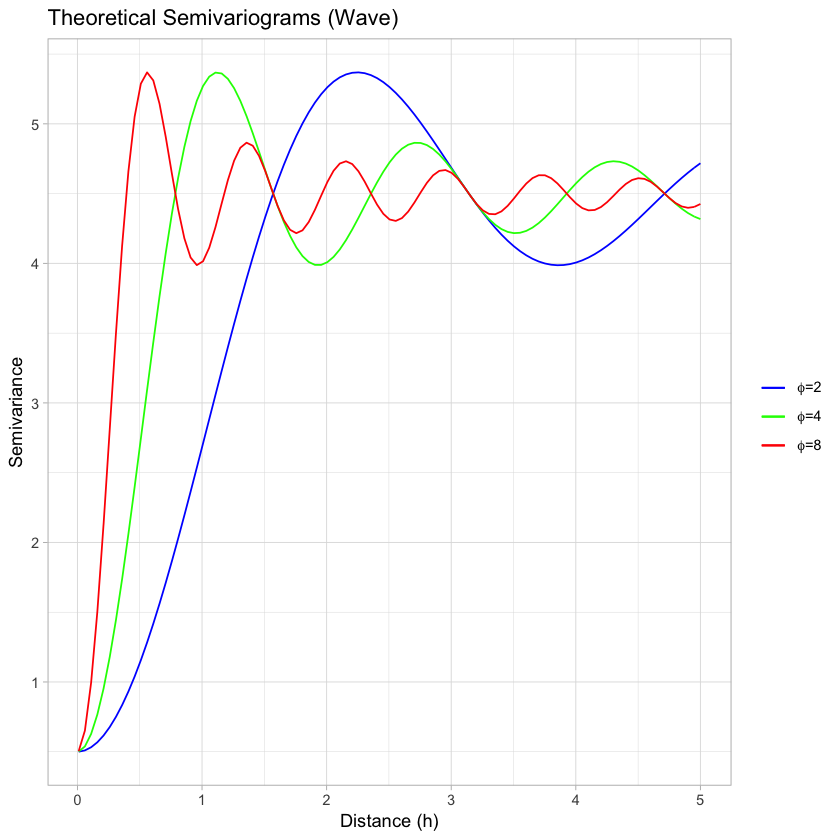

In [8]:
eq_wave = function(h){tao_sq + sigma_sq*(1-sin(phi*h)/(phi*h))}
eq_wave_b = function(h){tao_sq + sigma_sq*(1-sin(phi_big*h)/(phi_big*h))}
eq_wave_s = function(h){tao_sq + sigma_sq*(1-sin(phi_small*h)/(phi_small*h))}

ggplot(data.frame(x=c(0.01, 5)), aes(x=x)) +
    stat_function(fun=eq_wave_s, geom="line", aes(col='blue')) +
    stat_function(fun=eq_wave, geom="line", aes(col='green')) +
    stat_function(fun=eq_wave_b, geom="line", aes(col='red')) +
    labs(title='Theoretical Semivariograms (Wave)',
         x='Distance (h)',
         y='Semivariance') +
    scale_color_manual(labels=c(expression(phi*'=2'),
                                expression(phi*'=4'),
                                expression(phi*'=8')), 
                       values=c('blue','green','red'),
                       name=NULL)

* For the Rational Quadratic Model, phi is inversely proportional to data variance.
* For the Wave Model, the larger the phi, the sooner the curve converges to the asymptote.

# Covariograms

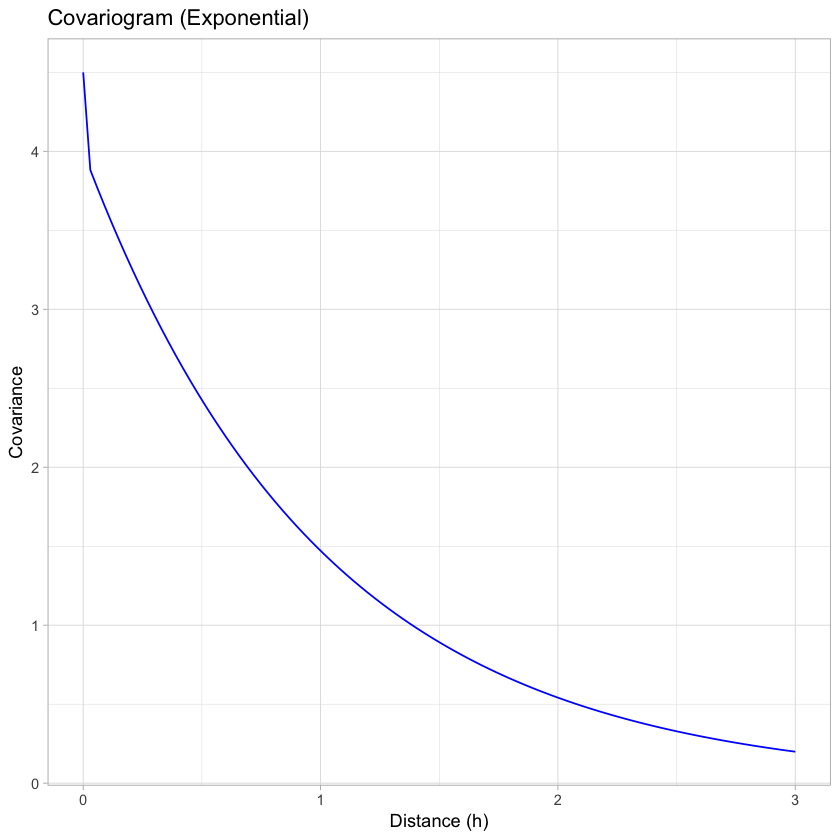

In [9]:
tao_sq = 0.5
sigma_sq = 4
phi = 1

# Exponential
eq_expo = function(h){
    ifelse(h==0, tao_sq+sigma_sq, sigma_sq*exp(-phi*h))
}

ggplot(data.frame(x=c(0, 3)), aes(x=x)) +
    stat_function(fun=eq_expo, geom="line", col='blue') +
    labs(title='Covariogram (Exponential)',
         x='Distance (h)',
         y='Covariance')

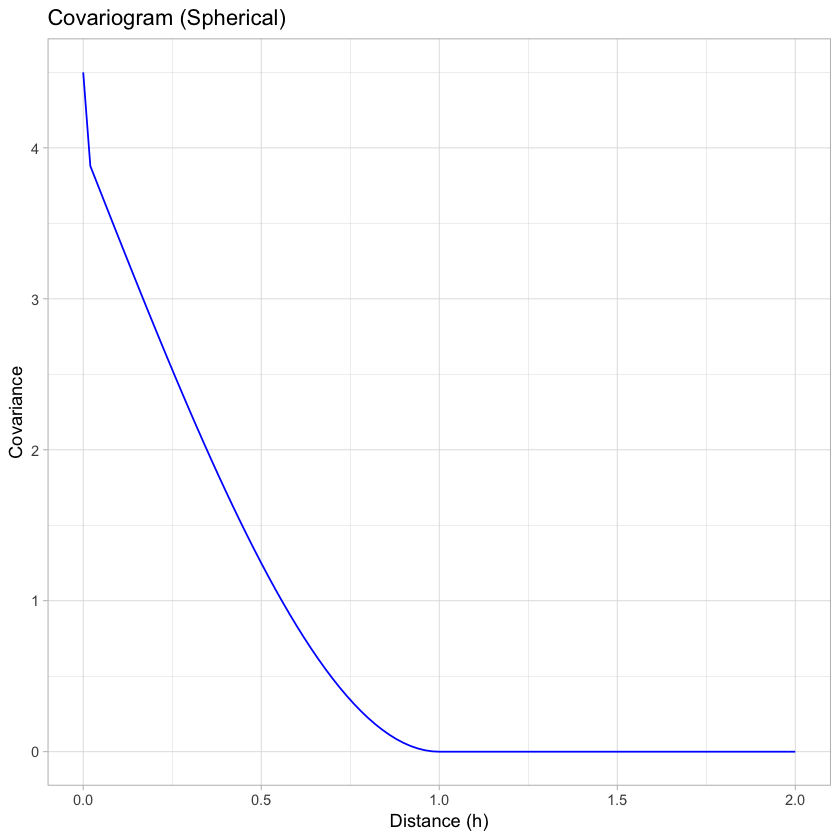

In [10]:
# Spherical
eq_sphere = function(h){
    ifelse(h==0, tao_sq+sigma_sq, ifelse(h>1/phi, 0, 
                                         sigma_sq*(1-3*phi*h/2+((phi*h)^3)/2)))
}


ggplot(data.frame(x=c(0, 2)), aes(x=x)) +
    stat_function(fun=eq_sphere, geom="line", col='blue') +
    labs(title='Covariogram (Spherical)',
         x='Distance (h)',
         y='Covariance')

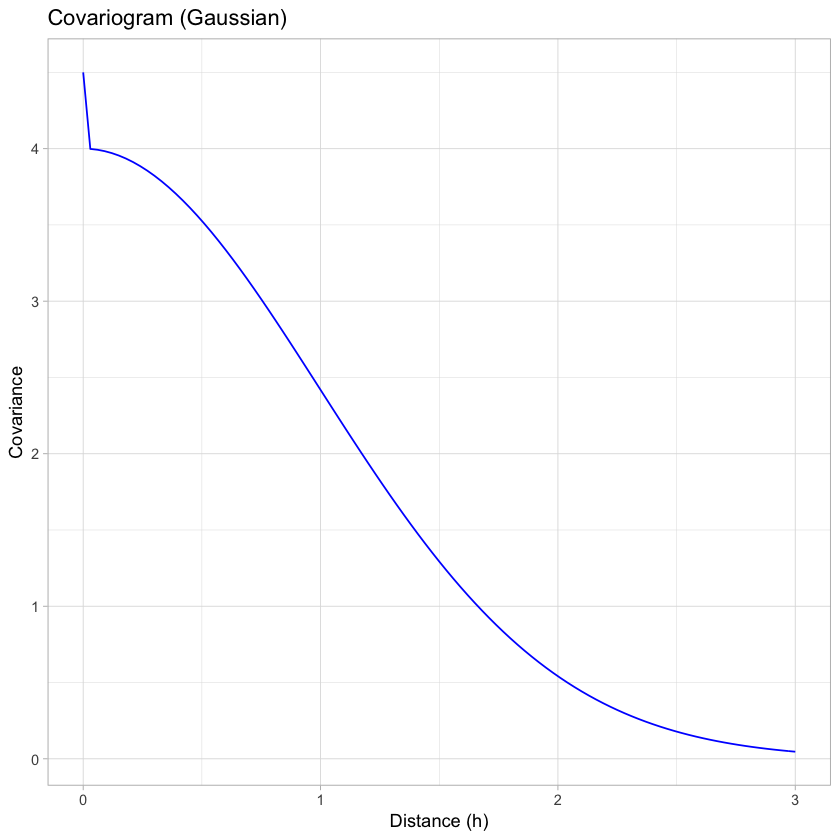

In [11]:
nu = 120

# Gaussian
eq_matern = function(h){
    ifelse(h==0, tao_sq+sigma_sq, sigma_sq/((gamma(nu))*2^(nu-1))*((
                        sqrt(2*nu)*h/phi)^nu)*besselK(
                            sqrt(2*nu)*h/phi, nu))}

ggplot(data.frame(x=c(0, 3)), aes(x=x)) +
    stat_function(fun=eq_matern, geom="line", col='blue') +
    labs(title='Covariogram (Gaussian)',
         x='Distance (h)',
         y='Covariance')

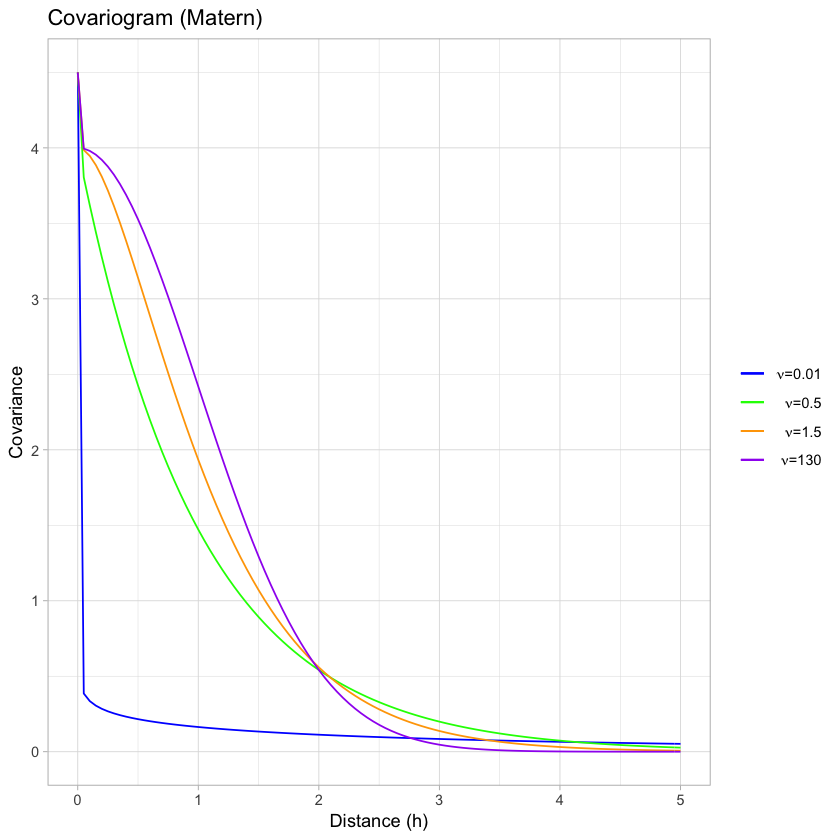

In [12]:
# 3.
nu_xs = 0.01
nu_s = 0.5
nu = 1.5
nu_xl = 130

# Matern
eq_matern = function(h){
    ifelse(h==0, tao_sq+sigma_sq, sigma_sq/((gamma(nu))*2^(nu-1))*((
                        sqrt(2*nu)*h/phi)^nu)*besselK(
                            sqrt(2*nu)*h/phi,nu))}

eq_matern_xs = function(h){
    ifelse(h==0, tao_sq+sigma_sq, sigma_sq/((gamma(nu_xs))*2^(nu_xs-1))*((
                        sqrt(2*nu_xs)*h/phi)^nu_xs)*besselK(
                            sqrt(2*nu_xs)*h/phi,nu_xs))}

eq_matern_s = function(h){
    ifelse(h==0, tao_sq+sigma_sq, sigma_sq/((gamma(nu_s))*2^(nu_s-1))*((
                        sqrt(2*nu_s)*h/phi)^nu_s)*besselK(
                            sqrt(2*nu_s)*h/phi,nu_s))}

eq_matern_xl = function(h){
    ifelse(h==0, tao_sq+sigma_sq, sigma_sq/((gamma(nu_xl))*2^(nu_xl-1))*((
                        sqrt(2*nu_xl)*h/phi)^nu_xl)*besselK(
                            sqrt(2*nu_xl)*h/phi,nu_xl))}

ggplot(data.frame(x=c(0, 5)), aes(x=x)) +
    stat_function(fun=eq_matern_xs, geom="line", aes(col='blue')) +
    stat_function(fun=eq_matern_s, geom="line", aes(col='green')) +
    stat_function(fun=eq_matern, geom="line", aes(col='orange')) +
    stat_function(fun=eq_matern_xl, geom="line", aes(col='purple')) +
    labs(title='Covariogram (Matern)',
         x='Distance (h)',
         y='Covariance') +
    scale_color_manual(labels=c(expression(nu*'=0.01'),
                                expression(nu*'=0.5'),
                                expression(nu*'=1.5'),
                                expression(nu*'=130')), 
                       values=c('blue','green','orange', 'purple'),
                       name=NULL)

Nu controls the smoothness of the realized random field, smoothness increases with nu.
* When nu = 0.5, the curve is equivalent to Exponential.
* When nu approaches infinity, the curve is equivalent to Gaussian.

# Empirical Semivariograms

In [13]:
storm = read_csv('dorian.csv')
storm = storm %>% 
            select(lat, lon, wind.sp, atm.press)
storm %>% head()

Parsed with column specification:
cols(
  lat = col_double(),
  lon = col_double(),
  temp = col_double(),
  dew.point = col_double(),
  ceiling.ht = col_double(),
  wind.dir = col_double(),
  wind.sp = col_double(),
  atm.press = col_double(),
  rh = col_double()
)


lat,lon,wind.sp,atm.press
32.483,-80.717,2.850000,1011.000
32.550,-80.450,1.083333,1010.500
32.782,-79.925,3.350000,1010.067
32.899,-80.041,4.566667,1010.150
32.900,-80.033,4.650000,1010.250
33.350,-79.183,4.700000,1007.833


    wind.sp         atm.press     
 Min.   : 1.083   Min.   : 967.7  
 1st Qu.: 2.850   1st Qu.:1004.2  
 Median : 4.678   Median :1009.4  
 Mean   : 6.572   Mean   :1005.9  
 3rd Qu.: 7.729   3rd Qu.:1010.6  
 Max.   :22.483   Max.   :1012.8  

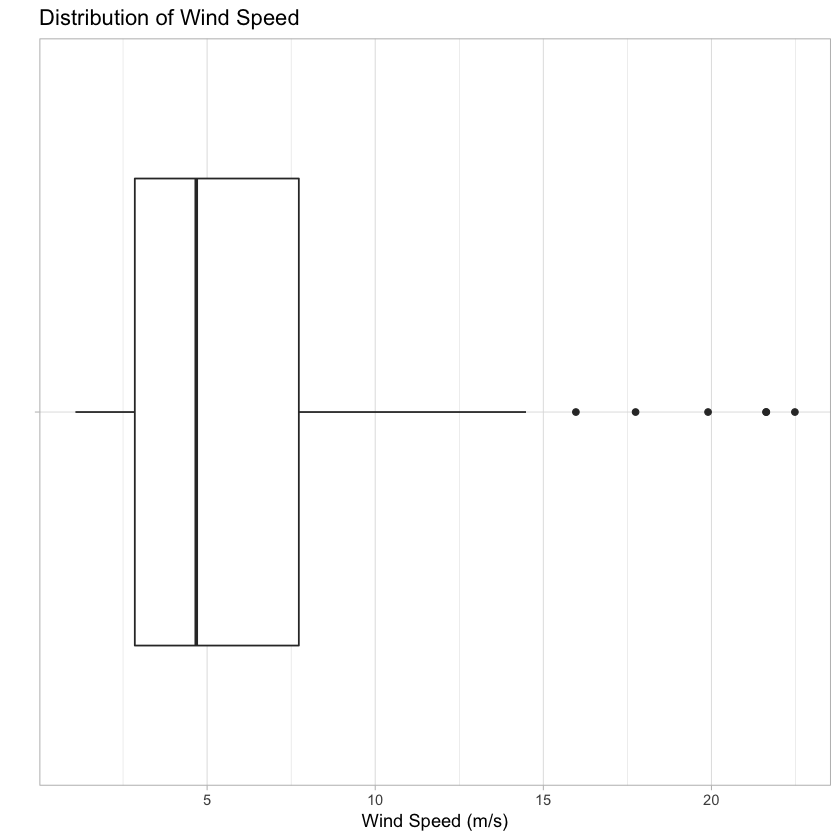

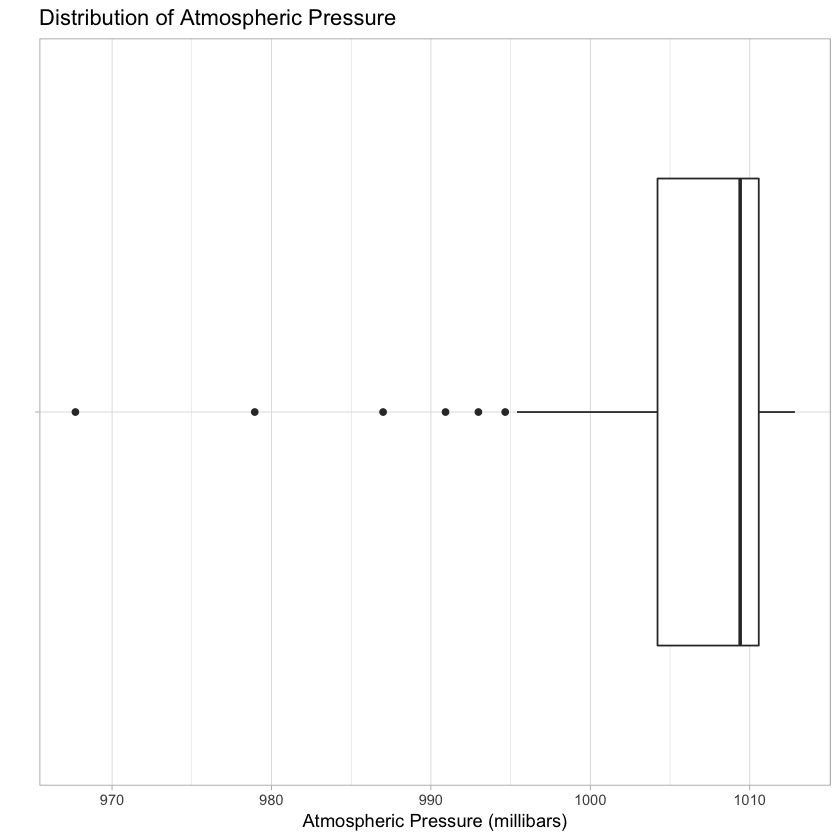

In [14]:
# 4.
summary(storm %>% select(wind.sp, atm.press))

ggplot(storm, aes('',wind.sp)) +
    geom_boxplot() +
    labs(title='Distribution of Wind Speed',
         x='',
         y='Wind Speed (m/s)') +
    coord_flip()

ggplot(storm, aes('',atm.press)) +
    geom_boxplot() +
    labs(title='Distribution of Atmospheric Pressure',
         x='',
         y='Atmospheric Pressure (millibars)') +
    coord_flip()

We can see wind speed is right skewed and atmospheric pressure is left skewed.

In [15]:
wind_palette = colorNumeric(c('darkgreen','goldenrod','brown','brown'),
                            domain=storm$wind.sp)

wind = leaflet(storm) %>% 
    addProviderTiles('CartoDB.Positron') %>% 
    addCircles(lat=~lat, lng=~lon, label=~paste0(round(wind.sp, 2), ' m/s'), 
               color=~wind_palette(wind.sp),
               opacity=1, fillOpacity=1, radius=500) %>%
    addLegend('bottomright', pal=wind_palette, values=storm$wind.sp,
              title='Wind Speed (m/s)', opacity=1)

htmlwidgets::saveWidget(wind, 'wind.html')
display_html('<iframe src="wind.html" width=100% height=450></iframe>')

The wind speed increases with increased proximity to the coast, which makes perfect sense.

In [16]:
storm_palette = colorNumeric(c('darkgreen','darkgreen','goldenrod','brown'),
                            domain=storm$atm.press)
atm = leaflet(storm) %>% 
    addProviderTiles('CartoDB.Positron') %>% 
    addCircles(lat=~lat, lng=~lon, label=~paste0(round(atm.press, 2), ' millibars'), 
               color=~storm_palette(atm.press),
               opacity=1, fillOpacity=1, radius=500) %>%
    addLegend('bottomright', pal=storm_palette, values=storm$atm.press,
              title='Atmospheric Pressure (millibars)', opacity=1, bins=5)

htmlwidgets::saveWidget(atm, 'atm.html')
display_html('<iframe src="atm.html" width=100% height=450></iframe>')

The atmospheric pressure decreases with increased proximity to the coast under a hurricane attack, which again makes perfect sense.

In [17]:
# 5.

# Use 17 because majority of area is within 17 as opposed to 18
proj_utm17='+proj=utm +zone=17 +north +datum=WGS84 +units=km'

newcoords = project(as.matrix(cbind(storm$lon, storm$lat)), proj=proj_utm17)
storm$x_utm = newcoords[,1]
storm$y_utm = newcoords[,2]

storm %>% head()

lat,lon,wind.sp,atm.press,x_utm,y_utm
32.483,-80.717,2.850000,1011.000,526.5898,3594.010
32.550,-80.450,1.083333,1010.500,551.6383,3601.535
32.782,-79.925,3.350000,1010.067,600.6707,3627.631
32.899,-80.041,4.566667,1010.150,589.6894,3640.498
32.900,-80.033,4.650000,1010.250,590.4367,3640.616
33.350,-79.183,4.700000,1007.833,669.0745,3691.563


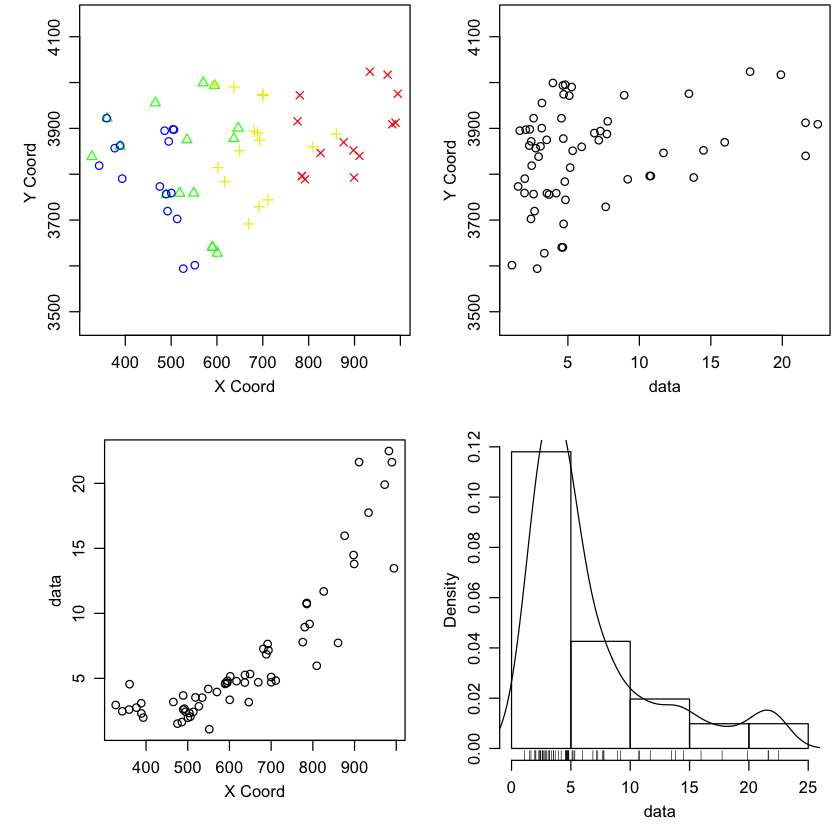

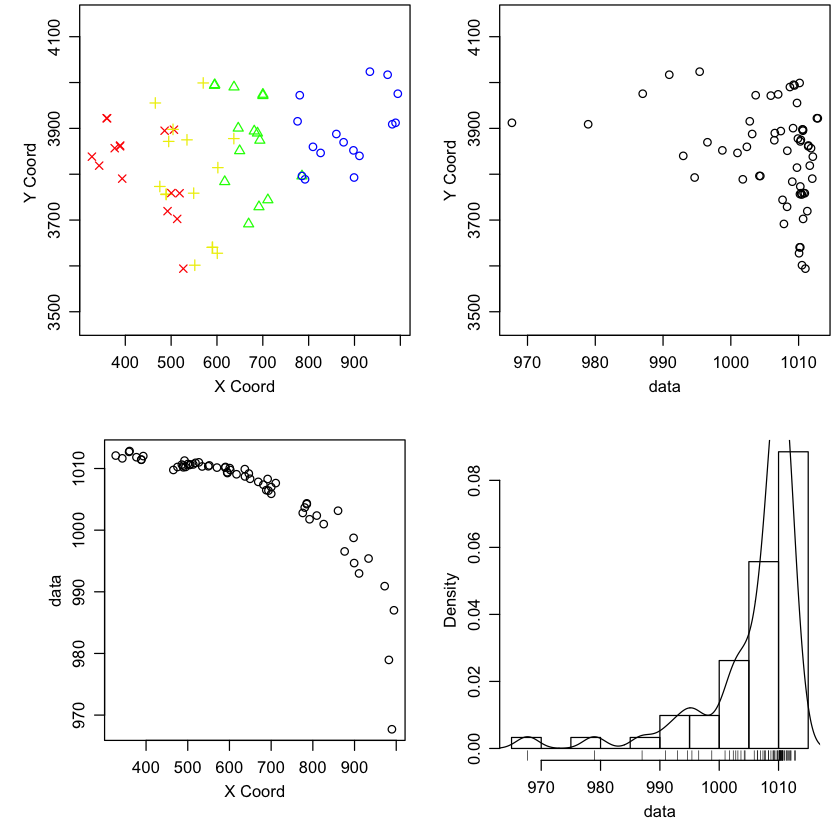

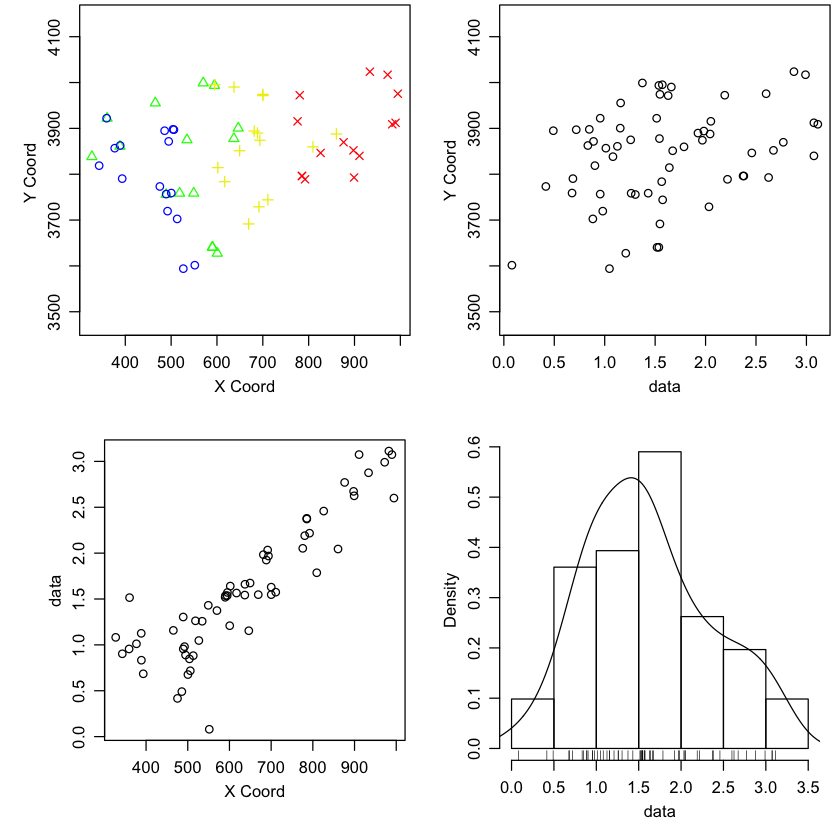

In [18]:
# 6&7.
geo_wind = as.geodata(storm, coords.col=c(5,6), data.col=3)
geo_atm = as.geodata(storm, coords.col=c(5,6), data.col=4)
plot(geo_wind) # A log transformation might help with the right skewness
plot(geo_atm) # Though left skewed, can't really square the already big values...

storm = storm %>% 
          mutate(log.wind.sp = log(wind.sp))

log_geo_wind = as.geodata(storm, coords.col=c(5,6), data.col=7)
plot(log_geo_wind)

variog: computing omnidirectional variogram
variog: computing omnidirectional variogram


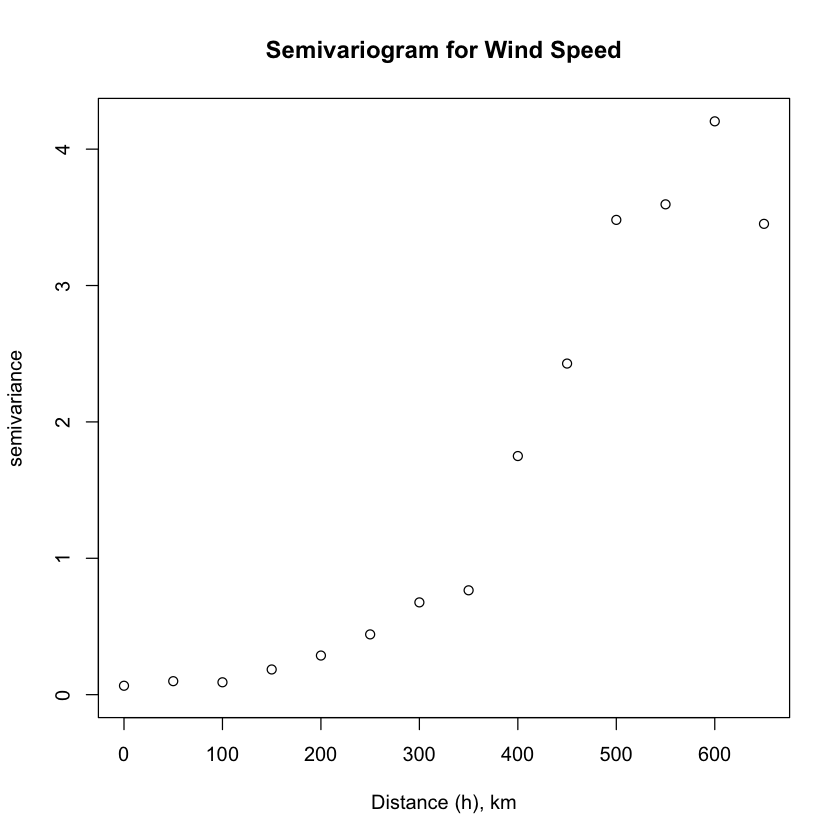

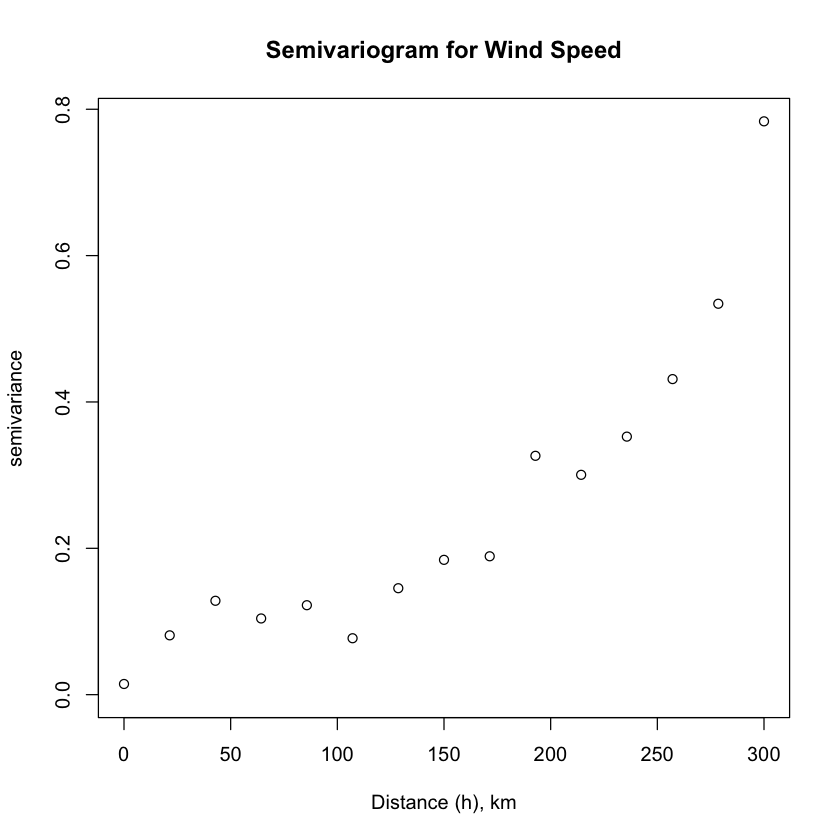

In [19]:
vario_wind = variog(log_geo_wind,uvec=seq(0,800,by=50),option="bin",estimator.type="modulus")
plot(vario_wind,xlab="Distance (h), km", main='Semivariogram for Wind Speed')

vario_wind_2 = variog(log_geo_wind,uvec=seq(0,300,l=15),option="bin",estimator.type="modulus")
plot(vario_wind_2,xlab="Distance (h), km", main='Semivariogram for Wind Speed')

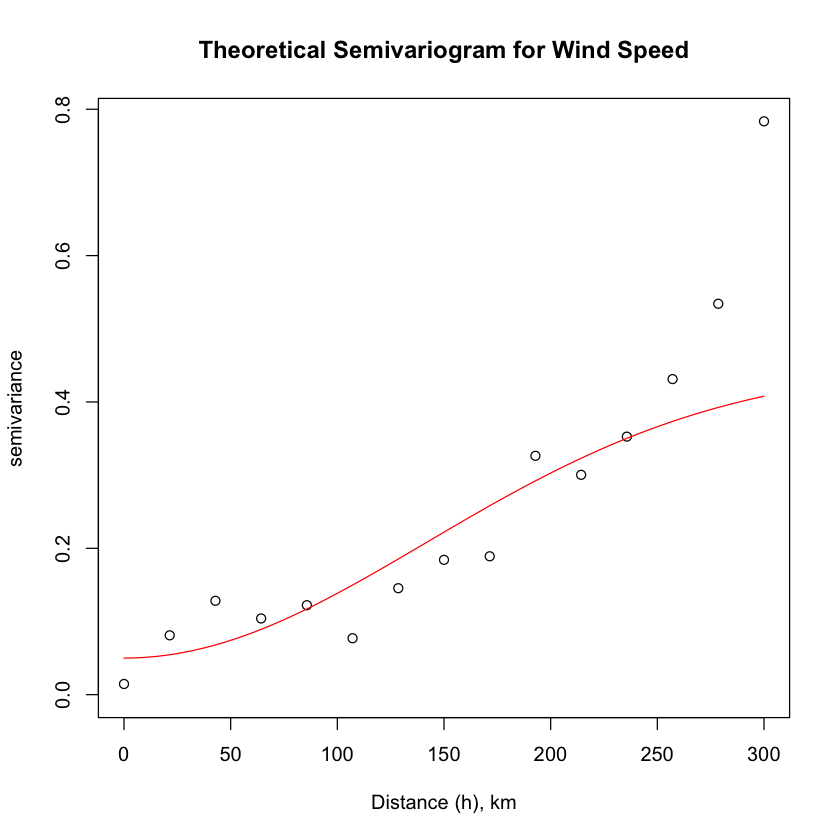

In [20]:
plot(vario_wind_2,xlab="Distance (h), km", 
     main='Theoretical Semivariogram for Wind Speed')
curve(0.05+0.4*(1-exp(-x^2/200^2)), from=0, to=300, # Gaussian Function
      col="red", ylab="Semivariance", xlab="Distance (h)", add=T)

variog: computing omnidirectional variogram
variog: computing omnidirectional variogram


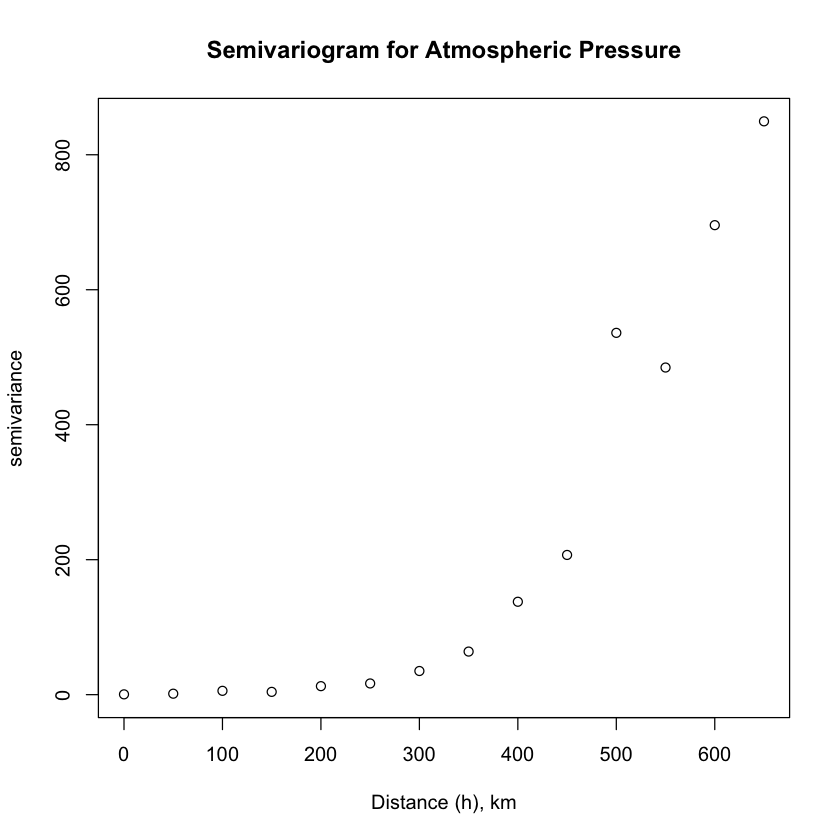

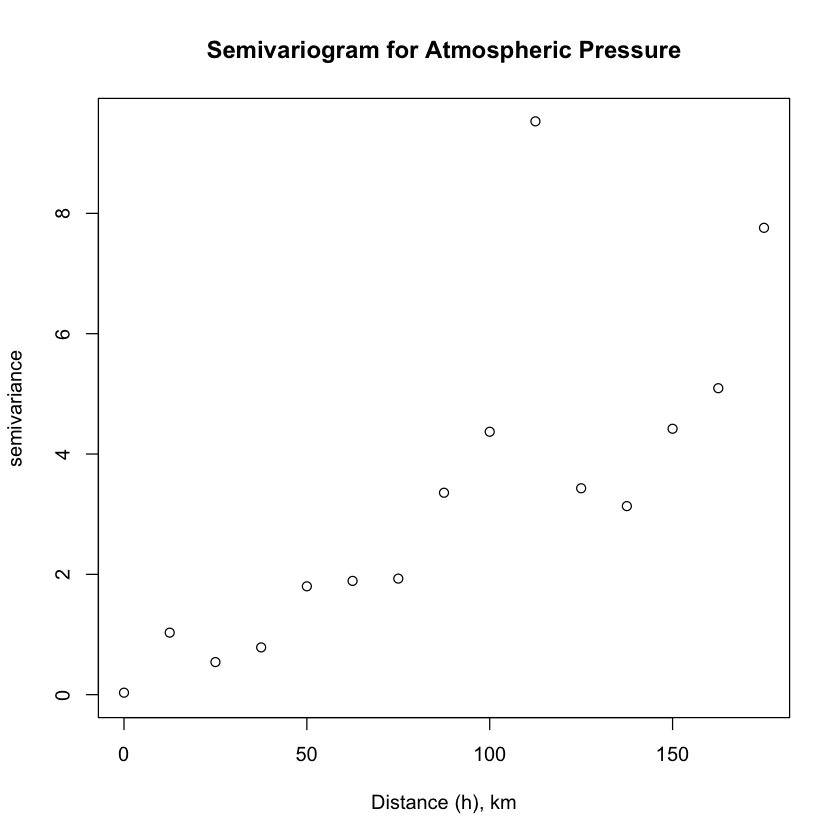

In [21]:
vario_atm = variog(geo_atm,uvec=seq(0,800,by=50),option="bin",estimator.type="modulus")
plot(vario_atm,xlab="Distance (h), km", main='Semivariogram for Atmospheric Pressure')

vario_atm_2 = variog(geo_atm,uvec=seq(0,175,l=15),option="bin",estimator.type="modulus")
plot(vario_atm_2,xlab="Distance (h), km", main='Semivariogram for Atmospheric Pressure')

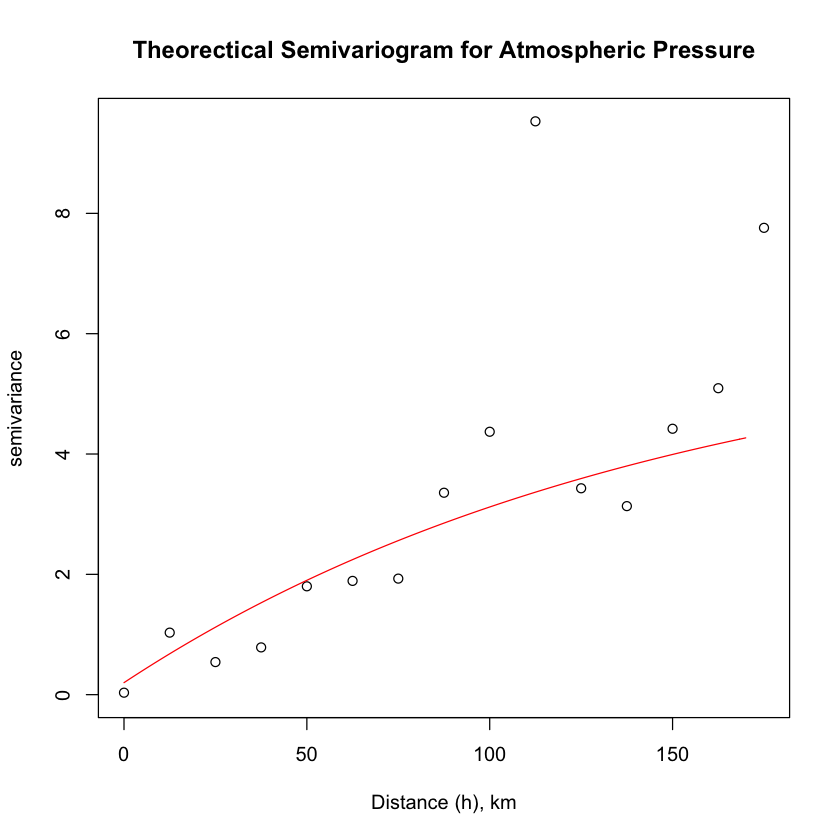

In [22]:
plot(vario_atm_2,xlab="Distance (h), km", 
     main='Theorectical Semivariogram for Atmospheric Pressure')
curve(0.2+6*(1-exp(-x/150)), from=0, to=170, # Exponential Function
      col="red", ylab="Semivariance", xlab="Distance (h)", add=T)

* Strength: **Atmospheric pressure** is a better indicator of strength, which is pinpointed by the **highly condensed coastal area of low atmospheric pressure** on the leaflet map.
* Scope: **Wind speed** is a better indicator of scope, which is reflected by the **color gradient change over a broader area** on the leaflet map.

- Overall, **Wind speed** is a better indicator because of a **better fit** and a **lower mean semivariance** within the respective ranges compared to atmospheric pressure.

In [23]:
# 9.
lm_wind = lm(log.wind.sp ~ lat + lon, data=storm)
summary(lm_wind)

lm_atm = lm(atm.press ~ lat + lon, data=storm)
summary(lm_atm)

confint(lm_wind)
confint(lm_atm)


Call:
lm(formula = log.wind.sp ~ lat + lon, data = storm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04597 -0.13171  0.05384  0.19337  0.80407 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.84044    2.59863   9.174 6.85e-13 ***
lat          0.08569    0.04562   1.879   0.0653 .  
lon          0.31701    0.02164  14.649  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3245 on 58 degrees of freedom
Multiple R-squared:  0.8084,	Adjusted R-squared:  0.8018 
F-statistic: 122.4 on 2 and 58 DF,  p-value: < 2.2e-16



Call:
lm(formula = atm.press ~ lat + lon, data = storm)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.5133  -1.7496   0.8305   2.8644   5.9324 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 757.5921    37.3565  20.280  < 2e-16 ***
lat          -0.6993     0.6558  -1.066    0.291    
lon          -3.4284     0.3111 -11.021 7.49e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.664 on 58 degrees of freedom
Multiple R-squared:  0.7005,	Adjusted R-squared:  0.6902 
F-statistic: 67.84 on 2 and 58 DF,  p-value: 6.513e-16


,2.5 %,97.5 %
(Intercept),18.63872517,29.0421597
lat,-0.00561995,0.1770096
lon,0.27369644,0.3603321


,2.5 %,97.5 %
(Intercept),682.814910,832.3693437
lat,-2.012043,0.6133466
lon,-4.051100,-2.8056700


* Both linear models reflect a linear spatial trend along the **longitude** only (p<0.0001).
* Average wind speed gets higher by 0.317 m/s (95% CI: \[0.274, 0.363\]) per degree to the east.
* Average atmospheric pressure gets lower by 3.43 millibars (95% CI: \[2.81, 4.05\]) per degree to the east.

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing omnidirectional variogram
variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 135 degrees (2.356 radians)
        tol

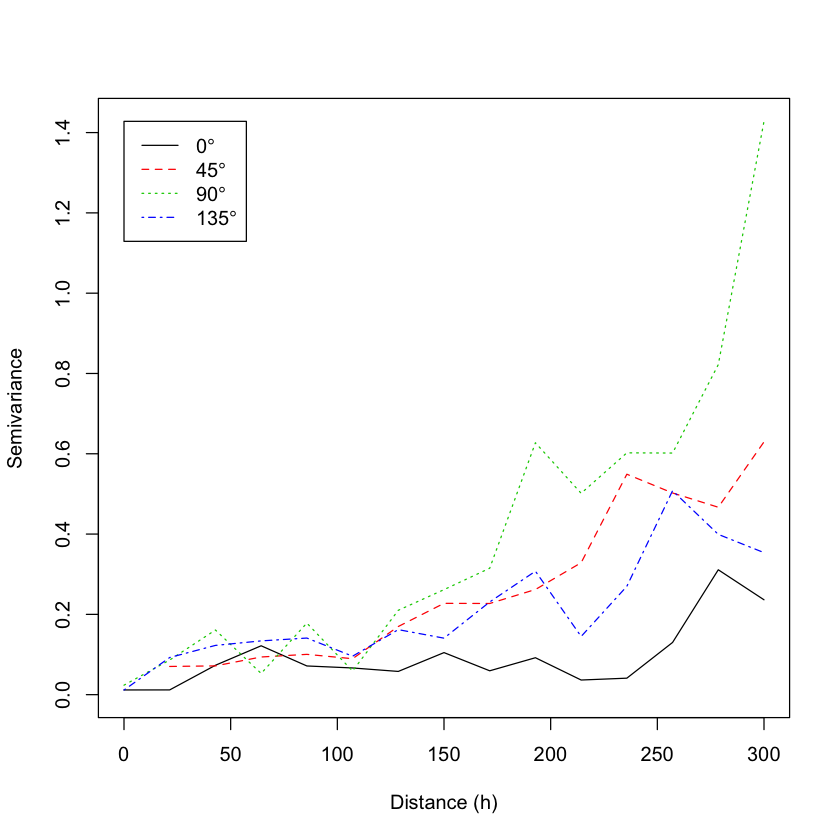

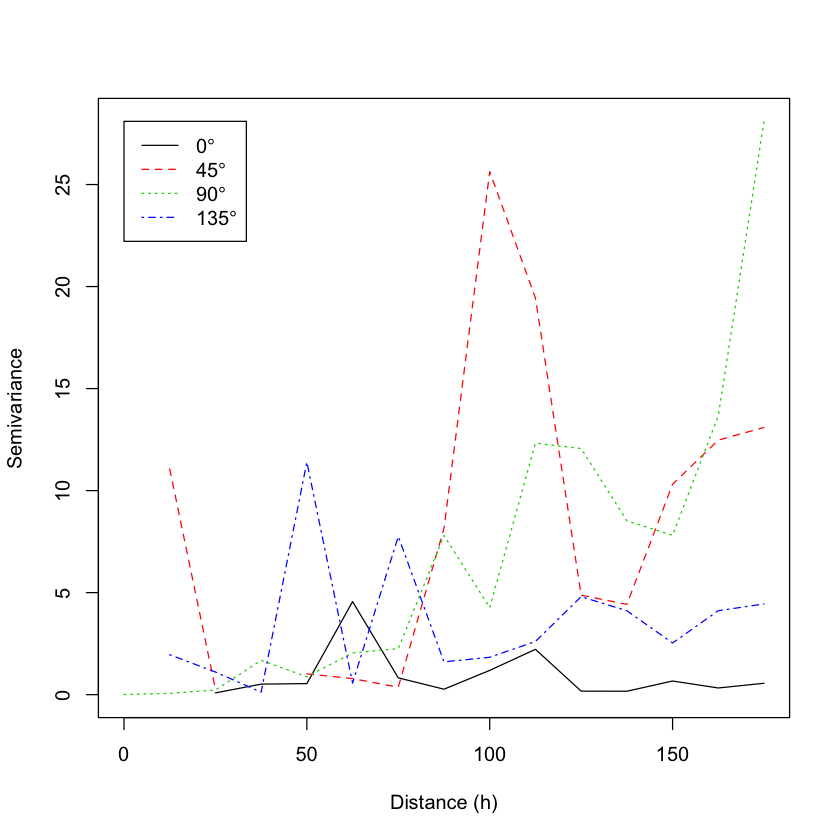

In [24]:
# 10.
plot(variog4(log_geo_wind,uvec=seq(0,300,l=15),option="bin",estimator.type="modulus"),
     ylab="Semivariance", xlab="Distance (h)")

plot(variog4(geo_atm,uvec=seq(0,175,l=15),option="bin",estimator.type="modulus"),
     ylab="Semivariance", xlab="Distance (h)")

While the directional variogram of wind speed looks fine, it appears there is substantial anisotropy in atmospheric pressure.